In [2]:
import os

# Definir o caminho para o arquivo de credenciais
credentials = r'C:/Users/leand/github_projects/PosTech_FIAP/Fase_3/postechanalyticsfase3-f73002a0f42f.json'

# Definir a variável de ambiente
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credentials

# Verificar se a variável de ambiente foi definida corretamente
print(os.environ['GOOGLE_APPLICATION_CREDENTIALS'])

C:/Users/leand/github_projects/PosTech_FIAP/Fase_3/postechanalyticsfase3-f73002a0f42f.json


In [3]:
!pip install db-dtypes


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import db_dtypes

C:\Users\leand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


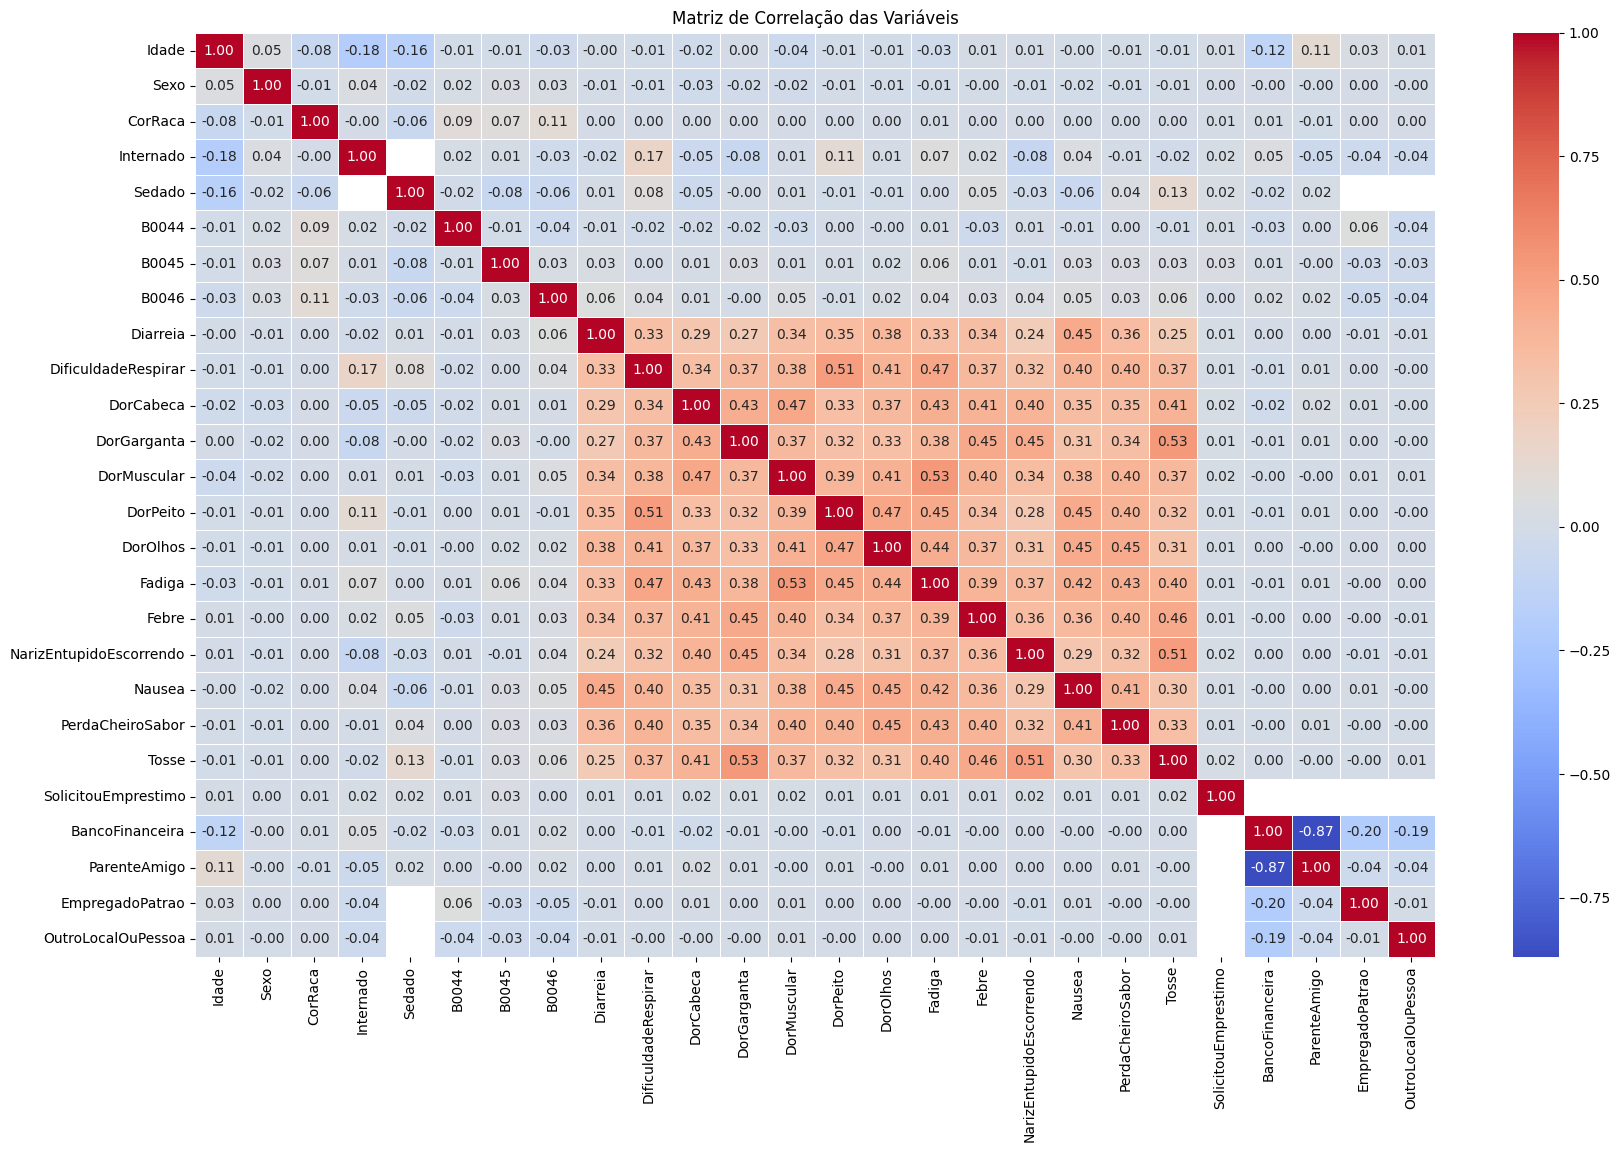

In [6]:
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Configurar cliente BigQuery
client = bigquery.Client()


# Consulta SQL para buscar os dados
query = """
SELECT A002 as Idade
      ,A003 as Sexo
      ,CASE A004 WHEN 9 THEN null ELSE A004 END as CorRaca
      ,CASE B005 WHEN 9 THEN null ELSE B005 END as Internado
      ,CASE B006 WHEN 9 THEN null ELSE B006 END as Sedado
      ,CASE B0044 WHEN 9 THEN null ELSE B0044 END as B0044 
      ,CASE B0045 WHEN 9 THEN null ELSE B0045 END as B0045
      ,CASE B0046 WHEN 9 THEN null ELSE B0046 END as B0046
      ,CASE B00113  WHEN 9 THEN null ELSE B00113 END  as Diarreia
      ,CASE B0014 WHEN 9 THEN null ELSE B0014 END as DificuldadeRespirar
      ,CASE B0015 WHEN 9 THEN null ELSE B0015 END  as DorCabeca
      ,CASE B0013 WHEN 9 THEN null ELSE B0013 END  as DorGarganta
      ,CASE B00112 WHEN 9 THEN null ELSE B00112 END  as DorMuscular
      ,CASE B0016 WHEN 9 THEN null ELSE B0016 END  as DorPeito
      ,CASE B00110 WHEN 9 THEN null ELSE B00110 END  as DorOlhos
      ,CASE B0019 WHEN 9 THEN null ELSE B0019 END  as Fadiga
      ,CASE B0011 WHEN 9 THEN null ELSE B0011 END  as Febre
      ,CASE B0018 WHEN 9 THEN null ELSE B0018 END  as NarizEntupidoEscorrendo
      ,CASE B0017 WHEN 9 THEN null ELSE B0017 END  as Nausea    
      ,CASE B00111 WHEN 9 THEN null ELSE B00111 END  as PerdaCheiroSabor
      ,CASE B0012 WHEN 9 THEN null ELSE B0012 END  as Tosse
      ,E001   as SolicitouEmprestimo
      ,E0021  as BancoFinanceira
      ,E0022  as ParenteAmigo
      ,E0023  as EmpregadoPatrao
      ,E0024  as OutroLocalOuPessoa
FROM `PNAD_COVID.PNAD_COVID_112020` 
"""

# Executar a consulta e transformar em DataFrame
df = client.query(query).to_dataframe()

# Criar matriz de correlação
correlation_matrix = df.corr()

# Gerar mapa de calor
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()
